# Redes neuronales convolucionales: Aplicación

¿Qué vamos a hacer?

- Implementar una red convolucional en Keras
- Entrenar la red en un dataset con fotos números con señas
- Usar la red para predecir en ejemplos nuevos

In [ ]:
from google.colab import files

uploaded = files.upload()
#subir el archivo dataset.zip

Saving dataset_signs.zip to dataset_signs.zip


In [ ]:
!unzip dataset_signs.zip

Archive:  dataset_signs.zip
   creating: datasets/
  inflating: datasets/train_signs.h5  
  inflating: datasets/test_signs.h5  
  inflating: cnn_utils.py            


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [ ]:
# Cargar el dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

SIGNS es un dataset con una colección de 6 signos hechos con manos representando los números del 0 al 5.

<img src="https://drive.google.com/uc?export=view&id=1Tm9arSkvypYpXzANQo4C2DtMWzkjA4hO" style="width:800px;height:300px;">

La próxima celda muestra un ejemplo de seña y su label.

y = 1


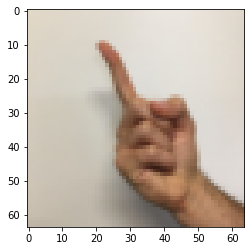

In [ ]:
# Ejemplo del dataset
index = 11
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
# veamos un poco el dataset
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("Número de ejemplos de training = " + str(X_train.shape[0]))
print ("Número de ejemplos de test = " + str(X_test.shape[0]))
print ("dimensiones de X_train: " + str(X_train.shape))
print ("dimensiones de Y_train: " + str(Y_train.shape))
print ("dimensiones de X_test: " + str(X_test.shape))
print ("dimensiones de Y_test shape: " + str(Y_test.shape))

Número de ejemplos de training = 1080
Número de ejemplos de test = 120
dimensiones de X_train: (1080, 64, 64, 3)
dimensiones de Y_train: (1080, 6)
dimensiones de X_test: (120, 64, 64, 3)
dimensiones de Y_test shape: (120, 6)


Estas son las capas de keras que vamos a utilizar:

Capa Convolucional:

`Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)`


Capa Max Pooling, la función tiene estos parámetros: 

`MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)`

Capa Flatten:

`Flatten(
    data_format=None, **kwargs
)`

Capa Dense:

`Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)`

Fuente: tps://www.tensorflow.org/api_docs/python/tf/keras/layers

Estructura de la red en detalle:

- CONV2D: filtro de 4x4, 8 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 8x8, stride 8, padding 'SAME'
- CONV2D: filtro de 2x2, 16 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 4x4, stride 4, padding 'SAME'
- FLATTEN
- Capa FC con 6 salidas


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
# usar Sequential
model = Sequential()
# agregar las capas

### Comenzar el código acá ###
model.add(Conv2D(filters = 8, kernel_size = (4, 4), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(8,8), strides=8, padding='same'))
model.add(Conv2D(filters = 16, kernel_size = (2, 2), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=4, padding='same'))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))


opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

model_history = model.fit(X_train, Y_train, epochs=30,batch_size= 64, validation_data=(X_test, Y_test))

Epoch 1/30
17/17 [==============================] - 3s 110ms/step - loss: 1.8005 - accuracy: 0.1991 - val_loss: 1.7896 - val_accuracy: 0.2583
Epoch 2/30
17/17 [==============================] - 2s 98ms/step - loss: 1.7711 - accuracy: 0.2407 - val_loss: 1.7415 - val_accuracy: 0.2917
Epoch 3/30
17/17 [==============================] - 2s 97ms/step - loss: 1.7001 - accuracy: 0.2880 - val_loss: 1.6539 - val_accuracy: 0.3083
Epoch 4/30
17/17 [==============================] - 2s 97ms/step - loss: 1.6042 - accuracy: 0.3231 - val_loss: 1.5257 - val_accuracy: 0.3583
Epoch 5/30
17/17 [==============================] - 2s 97ms/step - loss: 1.5165 - accuracy: 0.3815 - val_loss: 1.4514 - val_accuracy: 0.4250
Epoch 6/30
17/17 [==============================] - 2s 98ms/step - loss: 1.4301 - accuracy: 0.4046 - val_loss: 1.3757 - val_accuracy: 0.4667
Epoch 7/30
17/17 [==============================] - 2s 97ms/step - loss: 1.3867 - accuracy: 0.4333 - val_loss: 1.4193 - val_accuracy: 0.3667
Epoch 8/30
1

|  Capa     | Dimensiones de activación |Tamaño de activación | #de parámetros|
| :---      |    :----:          | :----: |          ---: |
| Entrada   | 64, 64, 3	       | 12288   |0
| Conv2D | 64, 64, 8        | 32768      | 392 = (4x4x3x8) + 8|
|MaxPool|8, 8, 8|512|	     		0|
|Conv2D|8, 8, 16|1024|528 = (2x2x8x16) + 16|
|MaxPool|2, 2, 16|64|0|
|Flatten|64|6|0|
|Dense|	  6|                          1|	                    390 = (64x6) + 6|